In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfcreation = pd.read_csv(filepath_or_buffer = './TABLE_CREATION_VF.csv')

In [3]:
dfdefaut = pd.read_csv(filepath_or_buffer = './TABLE_DEFAUT_VF.csv')

In [4]:
dfpib = pd.read_csv(filepath_or_buffer = './TABLE_PIB_CLEAN.csv')

In [5]:
dfchomage = pd.read_csv(filepath_or_buffer = './TABLE_CHOMAGE_VF.csv')

In [6]:
print(dfchomage.columns)

Index(['Code', 'Libellé', 'trimestre', 'chomage'], dtype='object')


In [7]:
print(dfpib.columns)

Index(['Région', 'Année', 'PIB_VAL', 'PIB_VOL', 'PIB_HAB', 'PIB_EMP'], dtype='object')


**Création de correspondance entre le code région et le libellé de région dans la data de PIB**

In [8]:
dfpib['Région'] = dfpib['Région'].str.upper()
mapping_df = dfchomage[['Code', 'Libellé']].drop_duplicates()
mapping_df['Libellé'] = mapping_df['Libellé'].str.upper()
mapping_df = mapping_df.merge(dfpib[['Région', 'Année', 'PIB_VAL', 'PIB_VOL', 'PIB_HAB', 'PIB_EMP']], 
                              how='left', left_on='Libellé', right_on='Région')
dfchomage = dfchomage.merge(mapping_df[['Code', 'Libellé', 'Année', 'PIB_VAL', 'PIB_VOL', 'PIB_HAB', 'PIB_EMP']], 
                            on=['Code', 'Libellé'], how='left')



In [9]:
print(dfchomage.columns)

Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')


In [10]:
print(dfcreation.columns)

Index(['Secteur', 'trimestre', 'code_region', 'code_dep', 'nombre_creation',
       'Quartile_MOY', 'Quartile_CV'],
      dtype='object')


In [11]:
#dfcreation[annee] = 
#dfcreation = dfcreation.rename(columns={'trimestre': 'annee'})

In [12]:
print(dfdefaut.columns)

Index(['Secteur', 'trimestre', 'code_region', 'code_dep', 'nombre_defaut'], dtype='object')


In [13]:
region_code = 1
dfcreation1 = dfcreation[dfcreation['code_region'] == region_code]
dfcreation1.sort_values('trimestre', inplace=True)

dfdefaut1 = dfdefaut[dfdefaut['code_region'] == region_code]
dfdefaut1.sort_values('trimestre', inplace=True)

dfchomage1 = dfchomage[dfchomage['Code'] == region_code]
dfchomage1.sort_values('trimestre', inplace=True)



/tmp/ipykernel_66910/657482980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcreation1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_66910/657482980.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdefaut1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_66910/657482980.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfchomage1.sort_values('trimestre', inplace=True)


In [14]:
annual_creation_sum = dfcreation1.groupby(['trimestre', 'code_region'])['nombre_creation'].sum().reset_index()
annual_creation_sum.head()
annual_defaut_sum = dfdefaut1.groupby(['trimestre', 'code_region'])['nombre_defaut'].sum().reset_index()
chomage_sum = dfchomage1.groupby(['trimestre', 'Code'])['chomage'].sum().reset_index()

In [15]:
annual_creation_sum.tail()

,trimestre,code_region,nombre_creation
0,2017,1,5244
1,2018,1,5701
2,2019,1,6369
3,2020,1,6345
4,2021,1,7623


In [16]:
dfchomage1 = dfchomage[dfchomage['Code'] == 1]
dfchomage1.sort_values('trimestre', inplace=True)
print(dfchomage1.columns)

Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')


/tmp/ipykernel_66910/1915582144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfchomage1.sort_values('trimestre', inplace=True)


In [19]:
dfchomage1 = dfchomage[dfchomage['Code'] == region_code]
dfchomage1.sort_values('trimestre', inplace=True)
dfchomage1['PIB_VOL'] = dfchomage1['PIB_VOL'].str.replace('\u202f', '').str.replace(',', '').astype(float)
#pib_sum = dfchomage1.groupby(['trimestre', 'Code'])['PIB_VOL'].mean().reset_index()
#print(pib_sum.head())
print(dfchomage1[dfchomage1['Code'] == 94][['trimestre', 'PIB_VOL']])



     trimestre  PIB_VOL
535       2017   8201.0
536       2017   8265.0
537       2017   8343.0
538       2017   8519.0
539       2017   8592.0
540       2017   8862.0
541       2017   9102.0
542       2017   9224.0
543       2017   8452.0
544       2017   9296.0
554       2018   9296.0
553       2018   8452.0
552       2018   9224.0
551       2018   9102.0
550       2018   8862.0
547       2018   8343.0
548       2018   8519.0
546       2018   8265.0
545       2018   8201.0
549       2018   8592.0
561       2019   9102.0
564       2019   9296.0
563       2019   8452.0
562       2019   9224.0
560       2019   8862.0
559       2019   8592.0
558       2019   8519.0
557       2019   8343.0
556       2019   8265.0
555       2019   8201.0
574       2020   9296.0
573       2020   8452.0
571       2020   9102.0
570       2020   8862.0
572       2020   9224.0
568       2020   8519.0
567       2020   8343.0
566       2020   8265.0
565       2020   8201.0
569       2020   8592.0
583       2021  

/tmp/ipykernel_66910/55324626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfchomage1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_66910/55324626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfchomage1['PIB_VOL'] = dfchomage1['PIB_VOL'].str.replace('\u202f', '').str.replace(',', '').astype(float)


/tmp/ipykernel_66910/322037676.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcreation1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_66910/322037676.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdefaut1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_66910/322037676.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfchomage1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_66910/322037676.py:19: 

Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')
Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')
Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')
Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')


/tmp/ipykernel_66910/322037676.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcreation1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_66910/322037676.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdefaut1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_66910/322037676.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfchomage1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_66910/322037676.py:19: 

Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')
Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')
Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')
Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')


/tmp/ipykernel_66910/322037676.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcreation1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_66910/322037676.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdefaut1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_66910/322037676.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfchomage1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_66910/322037676.py:19: 

Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')
Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')
Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')
Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')


/tmp/ipykernel_66910/322037676.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcreation1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_66910/322037676.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdefaut1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_66910/322037676.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfchomage1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_66910/322037676.py:19: 

Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')
Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')
Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')
Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')
Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')


/tmp/ipykernel_66910/322037676.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcreation1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_66910/322037676.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdefaut1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_66910/322037676.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfchomage1.sort_values('trimestre', inplace=True)
/tmp/ipykernel_66910/322037676.py:19: 

Index(['Code', 'Libellé', 'trimestre', 'chomage', 'Année', 'PIB_VAL',
       'PIB_VOL', 'PIB_HAB', 'PIB_EMP'],
      dtype='object')


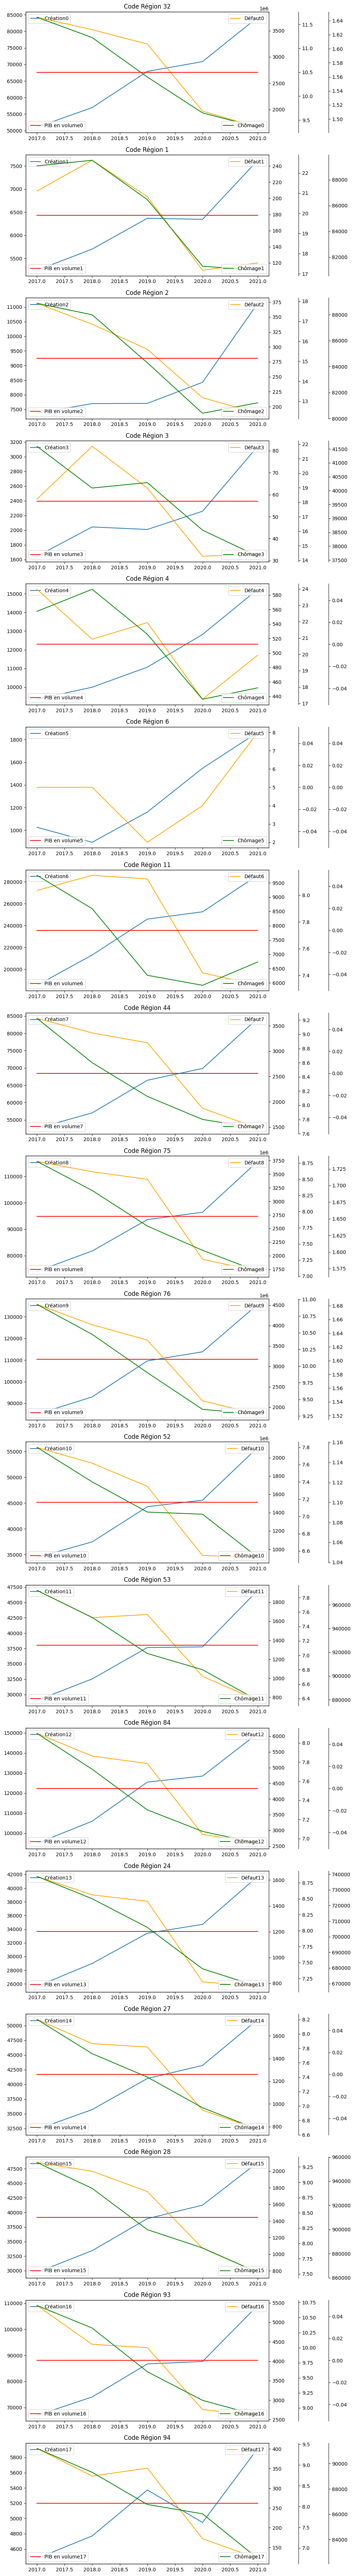

In [21]:
liste = set(dfcreation['code_region'])
num_subplots = len(liste)
fig, axs = plt.subplots(num_subplots, 1, figsize=(10, 4*num_subplots))

for i, region_code in enumerate(liste):
    dfcreation1 = dfcreation[dfcreation['code_region'] == region_code]
    dfcreation1.sort_values('trimestre', inplace=True)
    annual_creation_sum = dfcreation1.groupby(['trimestre', 'code_region'])['nombre_creation'].sum().reset_index()

    dfdefaut1 = dfdefaut[dfdefaut['code_region'] == region_code]
    dfdefaut1.sort_values('trimestre', inplace=True)
    annual_defaut_sum = dfdefaut1.groupby(['trimestre', 'code_region'])['nombre_defaut'].sum().reset_index()

    dfchomage1 = dfchomage[dfchomage['Code'] == region_code]
    dfchomage1.sort_values('trimestre', inplace=True)
    print(dfchomage1.columns)

    chomage_sum = dfchomage1.groupby(['trimestre', 'Code'])['chomage'].mean().reset_index()
    dfchomage1['PIB_VOL'] = dfchomage1['PIB_VOL'].str.replace('\u202f', '').str.replace(',', '').astype(float)
    pib_sum = dfchomage1.groupby('trimestre')['PIB_VOL'].sum().reset_index()

    #pib_sum = dfchomage1.groupby(['trimestre', 'Code'])['PIB_VOL'].mean().reset_index()

    # Créer des axes y supplémentaires pour chaque type de données
    ax1 = axs[i].twinx()
    ax2 = axs[i].twinx()
    ax3 = axs[i].twinx()

    ax2.spines['right'].set_position(('outward', 60))
    ax3.spines['right'].set_position(('outward', 120))

    # Tracer les courbes sur les axes y correspondants
    axs[i].plot(annual_creation_sum['trimestre'], annual_creation_sum['nombre_creation'], label=f'Création{i}')
    ax1.plot(annual_defaut_sum['trimestre'], annual_defaut_sum['nombre_defaut'], label=f'Défaut{i}', color='orange')
    ax2.plot(chomage_sum['trimestre'], chomage_sum['chomage'], label=f'Chômage{i}', color='green')
    ax3.plot(pib_sum['trimestre'], pib_sum['PIB_VOL'], label=f'PIB en volume{i}', color='red')  

    # Ajouter les légendes
    axs[i].legend(loc='upper left')
    ax1.legend(loc='upper right')
    ax2.legend(loc='lower right')
    ax3.legend(loc='lower left')
    
    # Ajouter le titre
    axs[i].set_title(f'Code Région {region_code}')

plt.tight_layout()
plt.show()
